In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
plt.style.use('fivethirtyeight')

In [51]:
#getting the stocks datasets
df = web.DataReader('INDUSINDBK.NS',data_source='yahoo',start='2020-06-01',end='2020-10-29')
#show the dataset
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,416.799988,401.049988,402.299988,410.100006,22990598,410.100006
2020-06-02,438.899994,404.250000,414.000000,434.700012,28744172,434.700012
2020-06-03,452.250000,426.100006,445.000000,432.350006,27908796,432.350006
2020-06-04,434.850006,405.000000,424.850006,415.049988,25795376,415.049988
2020-06-05,427.299988,411.200012,417.200012,422.350006,26349793,422.350006
...,...,...,...,...,...,...
2020-10-26,633.299988,613.549988,617.000000,616.650024,17438151,616.650024
2020-10-27,623.400024,595.099976,616.599976,614.000000,15012129,614.000000
2020-10-28,615.950012,586.099976,614.500000,592.849976,14933120,592.849976


In [52]:
df.shape

(109, 6)

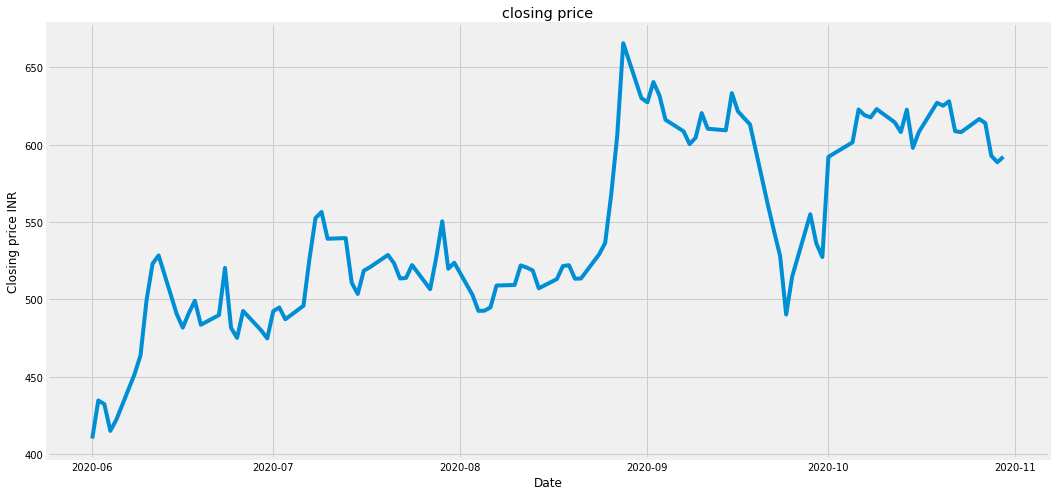

In [53]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price INR')
plt.show()

In [54]:
#create new database with only coloumns
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

88

In [55]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.09626298],
       [0.0870671 ],
       [0.01936991],
       [0.04793582],
       [0.16239482],
       [0.21052625],
       [0.35022498],
       [0.44237922],
       [0.46311875],
       [0.3148111 ],
       [0.28057123],
       [0.317159  ],
       [0.34865975],
       [0.28781054],
       [0.31226759],
       [0.43161812],
       [0.28018001],
       [0.25454895],
       [0.32263735],
       [0.27352764],
       [0.25317933],
       [0.32224614],
       [0.33144189],
       [0.30170221],
       [0.33574636],
       [0.45470543],
       [0.55762066],
       [0.57307756],
       [0.50538049],
       [0.50694584],
       [0.39405194],
       [0.36568176],
       [0.4245743 ],
       [0.43318323],
       [0.46429264],
       [0.44374872],
       [0.40481305],
       [0.40618279],
       [0.43885731],
       [0.37781249],
       [0.45724906],
       [0.54940318],
       [0.42946571],
       [0.444727  ],
       [0.3637252 ],
       [0.32283308],
       [0.323

In [56]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])


In [57]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [58]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(28, 60, 1)

In [69]:
#build LSTM model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [70]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [79]:
#train the model
model.fit(x_train,y_train,epochs=15,verbose=True,steps_per_epoch=5)

Epoch 1/15
5/5 [==============================] - 0s 30ms/step - loss: 0.0578
Epoch 2/15
5/5 [==============================] - 0s 31ms/step - loss: 0.0490
Epoch 3/15
5/5 [==============================] - 0s 34ms/step - loss: 0.0421
Epoch 4/15
5/5 [==============================] - 0s 30ms/step - loss: 0.0413
Epoch 5/15
5/5 [==============================] - 0s 32ms/step - loss: 0.0377
Epoch 6/15
5/5 [==============================] - 0s 45ms/step - loss: 0.0367
Epoch 7/15
5/5 [==============================] - 0s 32ms/step - loss: 0.0357
Epoch 8/15
5/5 [==============================] - 0s 32ms/step - loss: 0.0343
Epoch 9/15
5/5 [==============================] - 0s 31ms/step - loss: 0.0326
Epoch 10/15
5/5 [==============================] - 0s 31ms/step - loss: 0.0313
Epoch 11/15
5/5 [==============================] - 0s 31ms/step - loss: 0.0310
Epoch 12/15
5/5 [==============================] - 0s 31ms/step - loss: 0.0298
Epoch 13/15
5/5 [==============================] - 0s 33ms/st

In [80]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])




In [81]:
#convert the data to numpy 
x_test=np.array(x_test)


In [82]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [83]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [84]:
#geting the root_mean_squared error(RMSE)
rmse=np.sqrt( np.mean(predictions-y_test)**2)
rmse


21.086864653087797

In [85]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


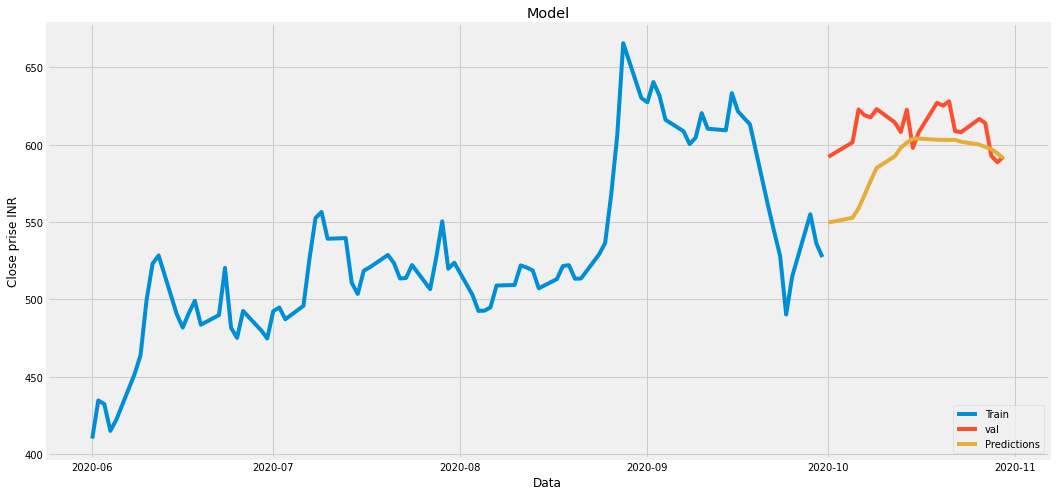

In [86]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','Predictions'],loc='lower right')
plt.show()

In [87]:
#show the valid and predicted value
valid

,Close,Predictions
Date,,
2020-10-01,592.200012,549.760559
2020-10-05,601.549988,552.822449
2020-10-06,622.799988,558.888489
2020-10-07,619.099976,567.560486
2020-10-08,617.700012,576.676697
2020-10-09,623.049988,585.093811
2020-10-12,614.450012,592.559082
2020-10-13,608.200012,598.048889
2020-10-14,622.650024,601.369324


In [88]:
#get the quote
sbi_quote=web.DataReader('SBIN.NS',data_source='yahoo',start='2020-01-15', end='2020-10-29')
new_df=sbi_quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
x_test=[]
x_test.append(last_60_days_scaled)
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_price=model.predict(x_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[369.50497]]


In [90]:
sbi_quote2=web.DataReader('SBIN.NS',data_source='yahoo',start='2020-04-20', end='2020-10-30')
print(sbi_quote2['Close'])

Date
2020-04-20    192.500000
2020-04-21    184.750000
2020-04-22    188.699997
2020-04-23    186.699997
2020-04-24    179.750000
                 ...    
2020-10-26    196.699997
2020-10-27    194.649994
2020-10-28    190.449997
2020-10-29    188.699997
2020-10-30    189.300003
Name: Close, Length: 137, dtype: float64
